# NumPy: Numerical Python

[NumPy](http://www.numpy.org/) is an open source package (i.e. extension library) for the Python programming language originally developed by [Travis Oliphant](https://en.wikipedia.org/wiki/Travis_Oliphant).  It primarily provides 

 * N-dimensional array data structures (some might call these tensors...) well suited for numeric computation.  
 
 * Sophisticaed "broadcasting" operations to allow efficient application of mathematical functions and operators over entire arrays of data, e.g. calling `sin(x)` an NumPy array `x` returns the element-wise sine of the numbers contained in `x`.

## "Duck" typing makes Python slow

If you've heard that Python is slow for numerical computations, it's primarily due to "duck typing".  Duck typing is a colloquial phrase that refers to the fact that in Python, we don't declare variable types (e.g. string, float, int, etc.) when we declare variables.  They are *inferred* at runtime.  In summary,

**Duck Typing:**

   * If it looks like a duck, then it is a duck.
   * a.k.a. dynamic typing
   * Dynamic typing requires lots of metadata around a variable.

This causes runtime overhead leading to poor performance in numerical computations.

**Solution**: NumPy data structures

   * Data structures, as objects, that have a single type and contiguous storage.
   * Common functionality with implementation in C.

Contiguous storage means that the array data is stored in a continuous "chunk" in memory, i.e. the elements of an array are next to each other in memory in the order they appear in the array.  This adds performance by avoiding "[cache misses](https://www.quora.com/What-is-a-cache-miss)" and other low-level performance issues.

Most NumPy operations can be expected to perform at a level very-close to what you would expect from compiled C code.

The fact that NumPy arrays are objects makes them slightly different that arrays in C code.  NumPy arrays have attributes that can be changed and queried, e.g. the shape or data type of an array.

## How slow is Python?

* Add 1 to a million numbers
    * Use `%timeit` magic function from IPython

To demonstrate the efficacy of NumPy, we'll perform the same operation, i.e. adding 1 to an array containing a million numbers, using a Python list comprehension and then using a NumPy array.

We use the `%timeit` magic function from [IPython](https://ipython.org/) which runs the command that follows it a number of times and reports some statistics on how long it takes the function to execute.  First, the Python list comprehension

In [1]:
%timeit [i+1 for i in range(1000000)]    

61.8 ms ± 221 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


And now the NumPy equivalent

Here the `+ 1` is *broadcast* across the array, i.e. each element has `1` added to it.

In [2]:
import numpy as np
%timeit np.arange(1000000)

737 µs ± 1.95 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Here we see that adding 1 to a million numbers in NumPy is significantly faster than using a Python list comprehension (which itself is much faster than a `for` loop would be in pure Python).

## Universal functions

* Universal functions are vectorized functions that operate on arrays in an element-by-element fashion.
* Arithmetic operators (`+`, `-`, `/`, `*`, `**`) are overloaded to work in an element-by-element fashion.

Another speed comparison:

In [3]:
import math
%timeit [math.sin(i) ** 2 for i in range(1000000)]

197 ms ± 991 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%timeit np.sin(np.arange(1000000)) ** 2

13.8 ms ± 27.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Creating NumPy arrays

NumPy offers several built-in functions for creating arrays

It's idiomatic to import NumPy with the statement

```python
import numpy as np
```

and use the abbreviated `np` namespace.

```python
import numpy as np
x = np.array([2,3,11])
x = np.array([[1,2.],[0,0],[1+1j,2.]])
x = np.arange(-10,10,2, dtype=float)
x = np.linspace(1.,4.,6)
x = np.fromfile('foo.dat')
```

NumPy arrays can be created from regular Python lists of floats, integers, strings, etc. and the types will be infered.  However, it's also possible (and not a bad idea to enhance readability/clarity) to specify the data-type explicitly using the optional keyword `dtype`.  There are several other ways to create arrays from `arange`, `linspace`, etc.  

Don't forget we can use the introspection features of IPython to show the documentation signature for NumPy functions, e.g.

In [5]:
import numpy
numpy.arange?

Docstring:
arange([start,] stop[, step,], dtype=None)

Return evenly spaced values within a given interval.

Values are generated within the half-open interval ``[start, stop)``
(in other words, the interval including `start` but excluding `stop`).
For integer arguments the function is equivalent to the Python built-in
`range` function, but returns an ndarray rather than a list.

When using a non-integer step, such as 0.1, the results will often not
be consistent.  It is better to use `numpy.linspace` for these cases.

Parameters
----------
start : number, optional
    Start of interval.  The interval includes this value.  The default
    start value is 0.
stop : number
    End of interval.  The interval does not include this value, except
    in some cases where `step` is not an integer and floating point
    round-off affects the length of `out`.
step : number, optional
    Spacing between values.  For any output `out`, this is the distance
    between two adjacent values, ``out[i+1]

In [6]:
import numpy
numpy.linspace?

Signature:
numpy.linspace(
    start,
    stop,
    num=50,
    endpoint=True,
    retstep=False,
    dtype=None,
    axis=0,
)
Docstring:
Return evenly spaced numbers over a specified interval.

Returns `num` evenly spaced samples, calculated over the
interval [`start`, `stop`].

The endpoint of the interval can optionally be excluded.

.. versionchanged:: 1.16.0
    Non-scalar `start` and `stop` are now supported.

Parameters
----------
start : array_like
    The starting value of the sequence.
stop : array_like
    The end value of the sequence, unless `endpoint` is set to False.
    In that case, the sequence consists of all but the last of ``num + 1``
    evenly spaced samples, so that `stop` is excluded.  Note that the step
    size changes when `endpoint` is False.
num : int, optional
    Number of samples to generate. Default is 50. Must be non-negative.
endpoint : bool, optional
    If True, `stop` is the last sample. Otherwise, it is not included.
    Default is True.
retstep

## Array functions

NumPy has many built-in functions for slicing, getting info, etc.

In [7]:
import numpy as np
x = np.arange(9).reshape(3,3)
x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

Here we create a one-dimensional array with  the `np.arange()` function that containts the integer numbers 0-9.  Then we reshape it to be a 3 x 3 array.  Keep in mind that the memory is still continguous and the reshape operation merely offers a different 'view' of the data.  It also allows us to use multiple indexes and special notation to retrieve parts of the data, e.g.

In [8]:
x[:,0]

array([0, 3, 6])

An explanation of the notation used in the operation above: the comma (`,`) separates dimensions of the array in the indexing operation.  The colon (`:`) represents *all* of that dimension.  So is this operation, the colon signifies getting all *rows*, i.e. the $0^\mbox{th}$ dimension of the array.  Along the second dimension, i.e. the columns, the `0` represents the $0^\mbox{th}$ indexed column.  

Getting parts of array with this type of notation is called *slicing* in NumPy.

In [9]:
x.shape

(3, 3)

`shape` is an attribute of the `x` NumPy array object.  We can see that it has been changed from what would have been originally `(9,)` before the `reshape()` class method was called.

Here is another, more sophisticated slicing operation.

In [10]:
y = x[::2, ::2]
y

array([[0, 2],
       [6, 8]])

The equivalent and more explicit syntax for this slicing operation might read:

```python
y = x[0:-1:2,0:-1:2]
```

The first `0:-1` gets *the $0^\mbox{th}$ entry through the last entry (-1 index)* along the $0^\mbox{th}$ dimesion, i.e. *all rows*.  The final `:2` indicates the increment, i.e. get every $2^\mbox{nd}$ entry along the dimension.

It's possible to use indexing to specify a single entry in an array, e.g.

In [11]:
y[0,0] = 100
y

array([[100,   2],
       [  6,   8]])

In [12]:
x

array([[100,   1,   2],
       [  3,   4,   5],
       [  6,   7,   8]])

Note that this operation also changes the value of the (0,0) entry in the original array.

In [13]:
x[0,0]

100

This is because the operation 

```python
y = x[::2, ::2]
```

is only a shallow copy or "view" to that portion of `x`.  If you wanted to make an actual copy of the data contained in `x` into `y`, use the `copy()` method.

In [14]:
y = x[::2, ::2].copy()
y[0,0] = 200

In [15]:
print("x = \n\n {}\n".format(x))
print("y = \n\n {}".format(y))

x = 

 [[100   1   2]
 [  3   4   5]
 [  6   7   8]]

y = 

 [[200   2]
 [  6   8]]


## Efficient and compact finite differences

A common approximation for computing derivatives of functions is a finite difference approximation

$$
\frac{\mathrm{d}}{\mathrm{d}x}y(x) \approx \frac{y(x + \Delta x) - y(x)}{\Delta x}
$$

or for discrete data

$$
\frac{\mathrm{d}}{\mathrm{d}x}y(x_i) \approx \frac{y(x_i + \Delta x_{i+1/2}) - y(x_i)}{\Delta x_{i+1/2}}
$$

where $\Delta x_{i + 1/2} = x_{i+1} - x_{i}$.  This operation can be accomplished efficiently and compactly using NumPy's slicing and vectorized algebraic operations.

In [16]:
x = np.arange(0,40,2)
y = x ** 2

dy_dx = (y[1:] - y[:-1]) / (x[1:] - x[:-1]); dy_dx

array([ 2.,  6., 10., 14., 18., 22., 26., 30., 34., 38., 42., 46., 50.,
       54., 58., 62., 66., 70., 74.])

A plot showing the derivative of the quadratic curve is a straight line as expected.

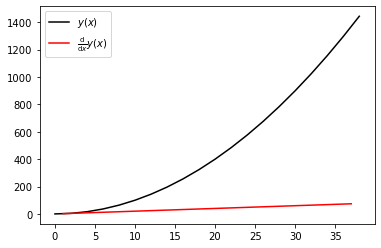

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x, y, 'k-', label=r'$y(x)$')
plt.plot((x[1:] + x[:-1]) / 2, dy_dx, 'r-', label=r'$\frac{\mathrm{d}}{\mathrm{d}x} y(x)$')
plt.legend();

## Sophisticated broadcasting rules

*Broadcasting* is a term that is used when performing arithmetic operations on arrays of different shapes.  The example of adding 1 to an array with one million entries shown earlier was a simple example of broadcasting.  A more complex operation is shown below.  

First we create 3 arrays, each with 800 rows and 600 columns of random numbers.  Then we combine these arrays into a multidimensional array with the shape (3, 800, 600).  Transposing this array gives us an 600 by 800 array (possibly representing individual pixels in an image), with each entry containing a three entris (possibly representing the RGB color definition of that pixel).  

In [18]:
red = np.random.rand(800,600)
blue = np.random.rand(800, 600)
green = np.random.rand(800, 600)
rgb = np.array([red, blue, green])
rgb.shape

(3, 800, 600)

We can scale the RGB values by half for each pixel by multiplying by another, smaller array.  This smaller array is *broadcast* accross the transpose of the `rbg` array along the trailing dimension.

In [19]:
rgb.T * np.array([0.5, 0.5, 0.25])

array([[[0.33989178, 0.03968023, 0.1942536 ],
        [0.42593013, 0.30427754, 0.22092827],
        [0.20252388, 0.44696531, 0.16054985],
        ...,
        [0.04358988, 0.41830603, 0.03702868],
        [0.30772766, 0.07850606, 0.2300356 ],
        [0.14068013, 0.09564061, 0.24959617]],

       [[0.29764322, 0.1576857 , 0.00322982],
        [0.21894485, 0.30311684, 0.21566541],
        [0.1429566 , 0.09727585, 0.19144946],
        ...,
        [0.29660657, 0.07445405, 0.20168228],
        [0.29069912, 0.46597064, 0.17125999],
        [0.06710337, 0.04737105, 0.13482073]],

       [[0.48043538, 0.31664194, 0.14395272],
        [0.3375148 , 0.16564302, 0.09933548],
        [0.07753075, 0.18722818, 0.20175465],
        ...,
        [0.15899148, 0.16422688, 0.05087453],
        [0.07728443, 0.30962606, 0.02164125],
        [0.25883662, 0.08781676, 0.17442062]],

       ...,

       [[0.00649519, 0.2269857 , 0.20189255],
        [0.14354905, 0.37594239, 0.03890218],
        [0.11388385, 0

Of course the arrays are quite large so inspecting the individual numbers is difficult.  Below are the two arrays plotted as images.

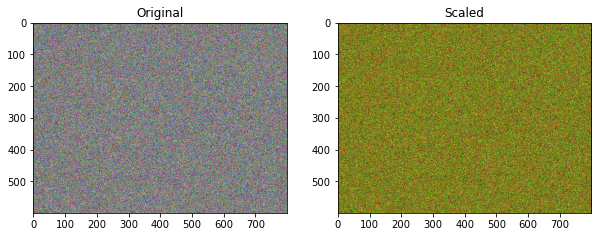

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2, figsize=(10,12) )
ax[0].imshow(rgb.T);
ax[0].set_title('Original');
ax[1].imshow(rgb.T * np.array([1., 1., 0.25]));
ax[1].set_title('Scaled');

## Fancy Indexing

Fancy indexing is special syntax, specific to NumPy, that allows for extracting parts of arrays.  Starting with an array `x`

In [21]:
x = np.arange(9); x

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

We saw earlier that you can select indiviual parts of arrays using indexing.  The following selects and returns the 4th entry of the array `x` cooresponding to the index 3.

In [22]:
x[3]

3

This functionality is extended by giving a list of indices.  The following selects the first, forth, and last (-1 index) entries in the array `x`.

In [23]:
x[[0,3,-1]]

array([0, 3, 8])

Notice this does not work on regular Python lists

In [26]:
xx = [1 ,3, 5, 7]
xx[[2,3]]

TypeError: list indices must be integers or slices, not list

Fancy indexing can also be used in multple dimensions.

In [27]:
y = x.reshape((3,3)); y

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

Now using the 0 index returns the entire first row.

In [28]:
y[0]

array([0, 1, 2])

Providing a list along the first dimension returns the entire second and third rows.

In [29]:
y[[1,2]]

array([[3, 4, 5],
       [6, 7, 8]])

A more complicated example where entries along each dimension are provided in a tuple.  This can be interpreted as requesting the $(0,0), (1,1),$ and $(2,0)$ entries.

In [30]:
y[([0,1,2],[0,1,0])]

array([0, 4, 6])

## Booleen Arrays

Booleen arrays can be combined with fancy indexing to provide a powerful way to do advanced data manipulation and cleaning.  We'll start by created a random array of integers selected between -10 and 10.

In [31]:
x = np.random.randint(-10, 10, 10); x

array([ -7,   6,   6,  -8,   6, -10,   3,  -3,  -4,   5])

We can use a broadcasted booleen operation to create a booleen array as follows.  In this case, everywhere in the array that the entry is greater than zero we get a `True`, and a `False` otherwise.

In [32]:
ind = x > 0; ind

array([False,  True,  True, False,  True, False,  True, False, False,
        True])

Now we can use this booleen array to return only the values of `x` that are greater than zero.

In [33]:
x[ind]

array([6, 6, 6, 3, 5])

The NumPy [`where()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html) function gives a powerful way to do selective data manipulation.  E.g. we can set the any values of the array `x` that are negative to `np.nan`.

In [34]:
y = np.where(ind, x, 0); y

array([0, 6, 6, 0, 6, 0, 3, 0, 0, 5])

## Further Reading 

Further reading on NumPy is available in the [official NumPy documentation](https://numpy.org/).

## Other packages

 * [xarray](https://xarray.pydata.org/en/stable/)
     * Labeled N-D arrays
 * [jax](https://jax.readthedocs.io/en/latest/notebooks/quickstart.html)
     * GPU/TPU Accelerated arrays
     * JIT compiler
     * Automatic differentiation

## xarray Example

In [35]:
import xarray as xr
data = np.random.rand(10, 3)

x = xr.DataArray(data, dims=['index', 'space'], 
                 coords={'space': ['x', 'y', 'z']}); x

<xarray.DataArray (index: 10, space: 3)>
array([[0.75863238, 0.92353483, 0.16048683],
       [0.73917031, 0.44102002, 0.91373054],
       [0.05497461, 0.5641364 , 0.92032348],
       [0.73603934, 0.60891683, 0.79908624],
       [0.39454134, 0.79184724, 0.19023863],
       [0.90238694, 0.48312614, 0.94288298],
       [0.04688557, 0.43574145, 0.97433831],
       [0.55315732, 0.96916022, 0.23205716],
       [0.69771709, 0.32608403, 0.53717087],
       [0.53226144, 0.9207058 , 0.54469376]])
Coordinates:
  * space    (space) <U1 'x' 'y' 'z'
Dimensions without coordinates: index

In [36]:
x.loc[:, 'x']

<xarray.DataArray (index: 10)>
array([0.75863238, 0.73917031, 0.05497461, 0.73603934, 0.39454134,
       0.90238694, 0.04688557, 0.55315732, 0.69771709, 0.53226144])
Coordinates:
    space    <U1 'x'
Dimensions without coordinates: index

In [37]:
x.sum(dim='index')

<xarray.DataArray (space: 3)>
array([5.41576633, 6.46427295, 6.2150088 ])
Coordinates:
  * space    (space) <U1 'x' 'y' 'z'

# JAX Example

Assume we have a function that takes a vector $x$ with 3 components $x_0$, $x_1$, and $x_2$, for example

$$
f(x) = x_0^2 + 2 x_1^3 + 7 x_2,
$$

The *gradient* of this function is

\begin{align}
\nabla f &= \left[ \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \frac{\partial f}{\partial x_3} \right] \\
         &= \left[ 2 x_0, 6 x_1^2, 7 \right]
\end{align}

and if we evaluate the gradient at point $x = (1,1,1)$ we have

\begin{align}
\nabla f([1, 1, 1]) &=  \left[ 2, 6, 7 \right]
\end{align}

In code:

In [38]:
import jax.numpy as jnp
from jax import grad, jacfwd

f = lambda x: x[0] ** 2 + 2 * x[1] ** 3 + 7 * x[2]

gradf = grad(f)

x = jnp.array([1.0, 1.0, 1.0])
gradf(x)

DeviceArray([2., 6., 7.], dtype=float32)

Also works for compositions of functions, Jacobians, etc. for example $\nabla \left(\nabla \left(\cos f(x) \right)\right)$

In [39]:
jacfwd(grad(lambda x: jnp.cos(f(x))))(x)

DeviceArray([[ 4.4443283, 10.068858 , 11.747002 ],
             [10.068858 , 36.734825 , 35.241005 ],
             [11.747002 , 35.241005 , 41.114506 ]], dtype=float32)

In [ ]:
%%javascript
function hideElements(elements, start) {
for(var i = 0, length = elements.length; i < length;i++) {
    if(i >= start) {
        elements[i].style.display = "none";
    }
}
}
var prompt_elements = document.getElementsByClassName("prompt");
hideElements(prompt_elements, 0)